In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd


In [2]:
#reading data
data = pd.read_excel('E:/car model listing/Book1.xlsx')
data.head()

,vin,year,make,model,trim,dealer_name,dealer_street,dealer_city,dealer_state,dealer_zip,...,driven_wheels,engine,fuel_type,exterior_color,interior_color,seller_website,first_seen_date,last_seen_date,dealer_vdp_last_seen_date,listing_status
0,KNAFK4A61F5428652,2015,Kia,FORTE,LX,X Nation Auto Group,6003 Bandera Rd,San Antonio,TX,78238.0,...,FWD,1.8L,NaN,Silver,Gray,https://xnationautogroup.com,2021-11-24,2022-08-17,2022-08-17,NaN
1,3GTP1NEJ7HG400459,2017,GMC,Sierra 1500,1500 SLT,X Nation Auto Group,6003 Bandera Rd,San Antonio,TX,78238.0,...,4X2,6.2L V8,NaN,White,N/a,https://xnationautogroup.com,2022-08-04,2022-08-17,2022-08-17,NaN
2,1B7HF13Z1XJ596452,1999,Dodge,Ram Pickup 1500,Laramie SLT,Clear Choice Automotive,3815 SE Naef Rd,Milwaukie,OR,97267.0,...,4WD,5.9L V8,Gasoline,Silver,Gray,https://www.clearchoiceautomotive.com,2022-05-10,2022-08-17,2022-05-11,NaN
3,JTEGD21A720036451,2002,Toyota,Highlander,4DR 2WD AT,Max Auto Sales,4895 Johnston St,Lafayette,LA,70503.0,...,NaN,NaN,NaN,NaN,NaN,https://maxautosalesla.com,2022-07-14,2022-08-17,2022-08-17,NaN
4,1NXBU4EE8AZ361720,2010,Toyota,Corolla,NaN,Max Auto Sales,4895 Johnston St,Lafayette,LA,70503.0,...,NaN,NaN,NaN,NaN,NaN,https://maxautosalesla.com,2022-07-26,2022-08-17,2022-08-17,NaN


In [3]:
data.isnull().sum() #checking for null values

vin                               0
year                              0
make                           5033
model                          2590
trim                          33296
dealer_name                       0
dealer_street                     0
dealer_city                       3
dealer_state                   3637
dealer_zip                    75205
listing_price                 93569
listing_mileage              155106
used                              0
certified                         0
style                        170406
driven_wheels                 70729
engine                        83611
fuel_type                    250820
exterior_color                69036
interior_color               160963
seller_website                  637
first_seen_date                   0
last_seen_date                    0
dealer_vdp_last_seen_date     68061
listing_status               978908
dtype: int64

In [4]:
#keeping only required columns
data_keep = data[['vin','year','make','model','listing_price','listing_mileage']]
data_keep.head()

,vin,year,make,model,listing_price,listing_mileage
0,KNAFK4A61F5428652,2015,Kia,FORTE,NaN,53960.0
1,3GTP1NEJ7HG400459,2017,GMC,Sierra 1500,32999.0,99697.0
2,1B7HF13Z1XJ596452,1999,Dodge,Ram Pickup 1500,6495.0,171168.0
3,JTEGD21A720036451,2002,Toyota,Highlander,NaN,NaN
4,1NXBU4EE8AZ361720,2010,Toyota,Corolla,NaN,NaN


In [5]:
#removing null values
data_keep.dropna(axis=0,inplace=True)

C:\Users\AKHIL TEJA REDDY Y\AppData\Local\Temp\ipykernel_17432\942772024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep.dropna(axis=0,inplace=True)


In [6]:
#combining year make and model columns into one column
data_car=data_keep.assign(car = data_keep.year.astype(str) + " " +data_keep.make.astype(str) + " " +data_keep.model.astype(str))
data_car.drop(['year','make','model'],inplace=True,axis=1)
data_car['car'].str.strip()
data_car.head()

,vin,listing_price,listing_mileage,car
1,3GTP1NEJ7HG400459,32999.0,99697.0,2017 GMC Sierra 1500
2,1B7HF13Z1XJ596452,6495.0,171168.0,1999 Dodge Ram Pickup 1500
5,JM1DKDB74M1500563,24999.0,15854.0,2021 Mazda CX-3
8,WAUKF78P99A015926,10990.0,100321.0,2009 Audi A3
9,1C4BJWEGXEL210903,22995.0,142650.0,2014 Jeep Wrangler Unlimited


In [7]:
#checking for corelation
data_car.corr() #it shows negative correlation

C:\Users\AKHIL TEJA REDDY Y\AppData\Local\Temp\ipykernel_17432\3373776407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_car.corr() #it shows negative correlation


,listing_price,listing_mileage
listing_price,1.000000,-0.374406
listing_mileage,-0.374406,1.000000


<Axes: ylabel='listing_mileage'>

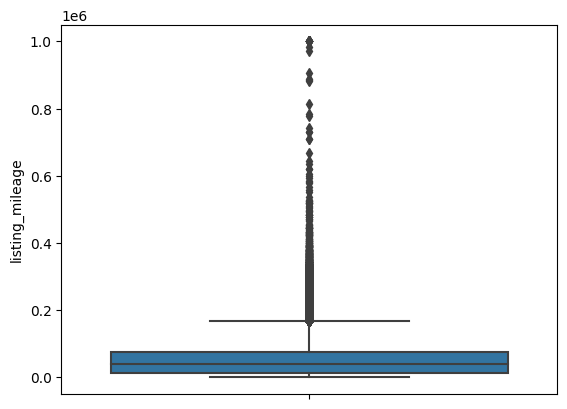

In [8]:
import seaborn as sns
sns.boxplot(y = data_car['listing_mileage'])

In [9]:
data_car1 = data_car.copy()
data_car1

,vin,listing_price,listing_mileage,car
1,3GTP1NEJ7HG400459,32999.0,99697.0,2017 GMC Sierra 1500
2,1B7HF13Z1XJ596452,6495.0,171168.0,1999 Dodge Ram Pickup 1500
5,JM1DKDB74M1500563,24999.0,15854.0,2021 Mazda CX-3
8,WAUKF78P99A015926,10990.0,100321.0,2009 Audi A3
9,1C4BJWEGXEL210903,22995.0,142650.0,2014 Jeep Wrangler Unlimited
...,...,...,...,...
1048569,1FMCU9BZ5LUC55981,32750.0,29366.0,2020 Ford Escape SE Sport Hybrid SUV
1048570,VNKKTUD30JA086988,22999.0,43371.0,2018 Toyota Yaris
1048571,1G1FH3D73L0121209,55995.0,925.0,2020 Chevrolet Camaro
1048572,1FTEW1EG8JFB58696,34999.0,83054.0,2018 Ford F-150


In [10]:
#the difference of finding market value after removing outliers and before removing can be seen below
data_car_sample1 = data_car1[data_car1['car'] == '2018 Toyota Yaris']
print(data_car_sample1['listing_price'].mean()) #average market value after removing outliers

data_car_sample = data_car[data_car['car'] == '2018 Toyota Yaris']
print(data_car_sample['listing_price'].mean()) #average market values before removing outlier values


21126.058823529413
21126.058823529413


<Axes: ylabel='listing_mileage'>

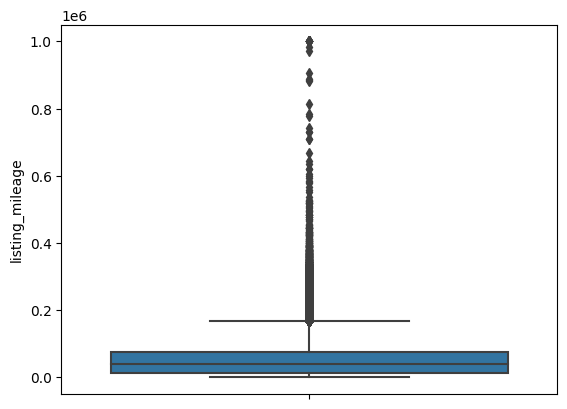

In [11]:
sns.boxplot(y = data_car1['listing_mileage']) #there are no outliers

So we are considering data_car1 table to find the market value, since mileage shouldnt affect the market value. So, outliers are being removed to find out the market value.

In [12]:
data_car1.to_csv('car_data2.csv')